# Oasis Project 2 Unemployment Analysis

## 1. Data Cleaning

In [1]:
import pandas as pd

data = pd.read_csv("Unemployment.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Exploratory Data Analysis

In [2]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [3]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [4]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
data.columns = data.columns.str.strip()
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [9]:
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)

In [10]:
data['Date'].dtype


dtype('<M8[ns]')

## 3. Visualization

In [11]:
group_by = data.groupby("Date")["Estimated Labour Participation Rate (%)"].mean()

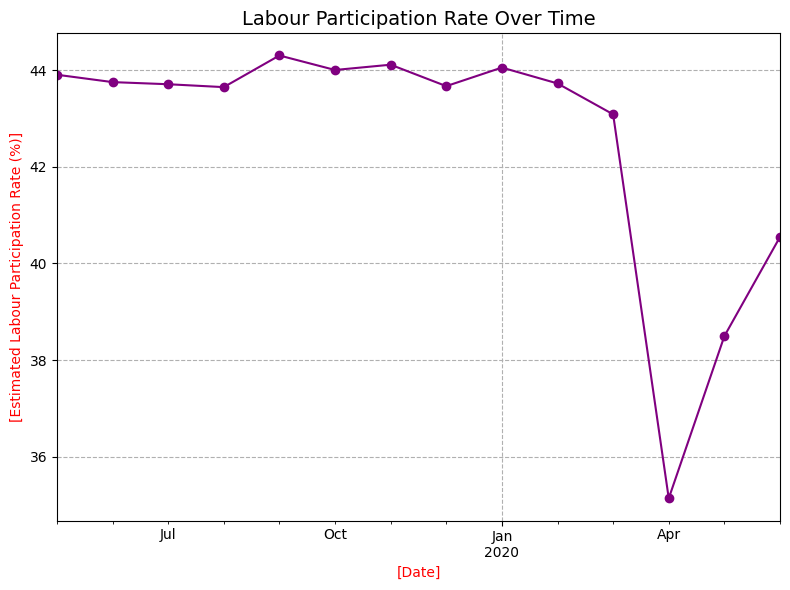

In [12]:
import matplotlib.pyplot as plt

group_by.plot(marker='o', color='purple', figsize=(8,6))
plt.title("Labour Participation Rate Over Time", fontsize=14)
plt.xlabel("[Date]", color='red')
plt.ylabel("[Estimated Labour Participation Rate (%)]",color='red')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()


In [13]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [14]:
groupby_area = data.groupby("Area")["Estimated Unemployment Rate (%)"].mean()

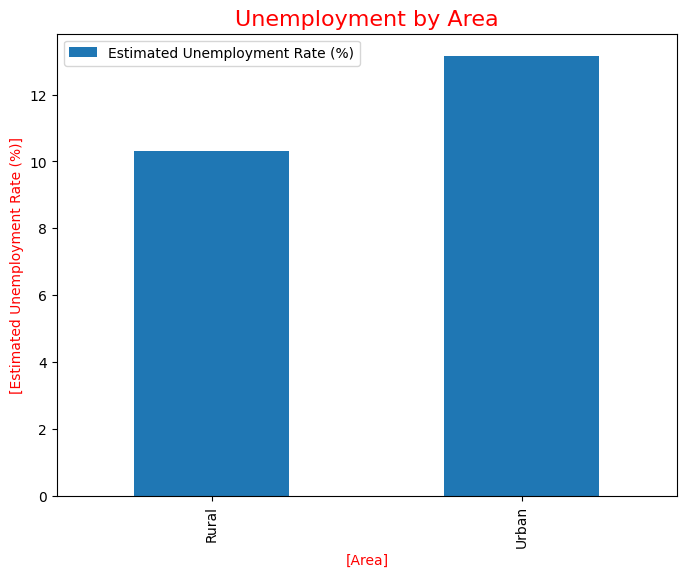

In [15]:
groupby_area.plot(kind="bar",figsize=(8,6))
plt.title("Unemployment by Area",fontsize=16,color="red")
plt.xlabel("[Area]",color="red")
plt.ylabel("[Estimated Unemployment Rate (%)]", color="red")
plt.legend()
plt.show()



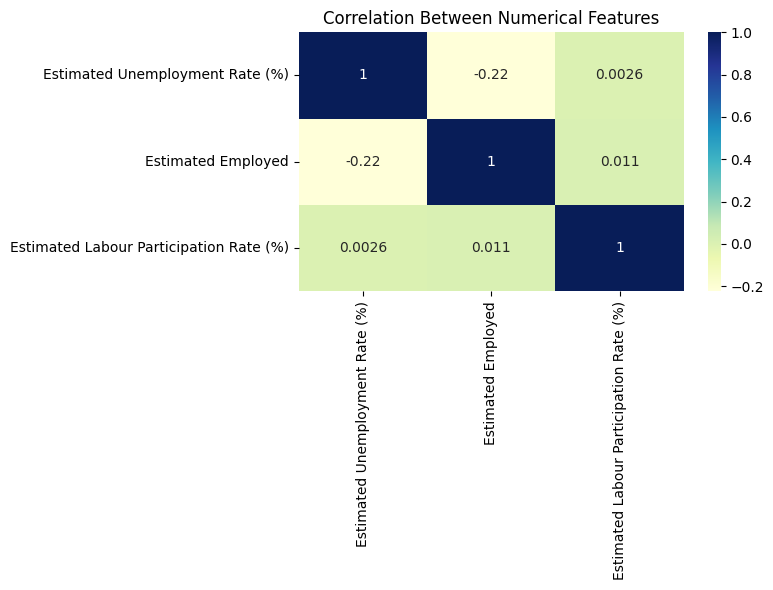

In [16]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()
